<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [20]:
data = pd.read_csv('22161-0001-Data.tsv', sep='\t')
data.head()

INC_ID IFMULTIPLE  VICCOUNT  VICSEQ  OFFCOUNT  OFFSEQ STCODE  STNUMBER  \
0       1       SVSO         1       1         2       1     AL         1   
1       1       SVMO         1       1         2       2     AL         1   
2       2       SVSO         1       1         1       1     AL         1   
3       3       SVSO         3       1         2       1     AL         1   
4       3       SVMO         3       1         2       2     AL         1   

       ORI  POPGROUP    ...     VICAGE5  VICSEX5  VICRACE5  OFFAGE5 OFFSEX5  \
0  AL00100        91    ...           5        1         1        3       1   
1  AL00100        91    ...           5        1         1        2       1   
2  AL00100        91    ...           3        1         2        5       2   
3  AL00100        91    ...           6        2         2        2       1   
4  AL00100        91    ...           6        2         2        3       1   

  OFFRACE5  WEAPON5 RELATION5 CIRCUM5     MIWT5  
0        1        1         2       2  1.221084  
1        1        1         2       2  1.221084  
2        2        1         3       2  1.273329  
3        2        1         4       1  1.198304  
4        2        1         4       1  1.198304  

[5 rows x 97 columns]

In [21]:
data = data.loc[(data['IFMULTIPLE'] == 'SVSO'), :]

In [22]:
heatmap = pd.pivot_table(data, index='VICAGE', columns='OFFAGE', values='VICCOUNT', aggfunc='sum')
heatmap = heatmap.drop(99, axis=0).drop(99, axis=1)
heatmap.head()

OFFAGE   6    7    8    9    10    11    12    13    14     15 ...  89  90  \
VICAGE                                                         ...           
0       8.0  4.0  3.0  4.0  7.0  12.0  12.0  20.0  60.0  102.0 ... NaN NaN   
1       3.0  4.0  2.0  2.0  5.0   5.0  10.0  19.0  27.0   30.0 ... NaN NaN   
2       2.0  1.0  4.0  2.0  2.0   3.0   9.0  22.0  16.0   23.0 ... NaN NaN   
3       4.0  1.0  1.0  1.0  2.0   4.0   7.0  15.0  14.0   13.0 ... NaN NaN   
4       NaN  1.0  1.0  5.0  2.0   NaN   3.0   6.0  10.0   10.0 ... NaN NaN   

OFFAGE  91  92  93  94  95  96  97  98  
VICAGE                                  
0      NaN NaN NaN NaN NaN NaN NaN NaN  
1      NaN NaN NaN NaN NaN NaN NaN NaN  
2      NaN NaN NaN NaN NaN NaN NaN NaN  
3      NaN NaN NaN NaN NaN NaN NaN NaN  
4      NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 93 columns]

(0, 100)

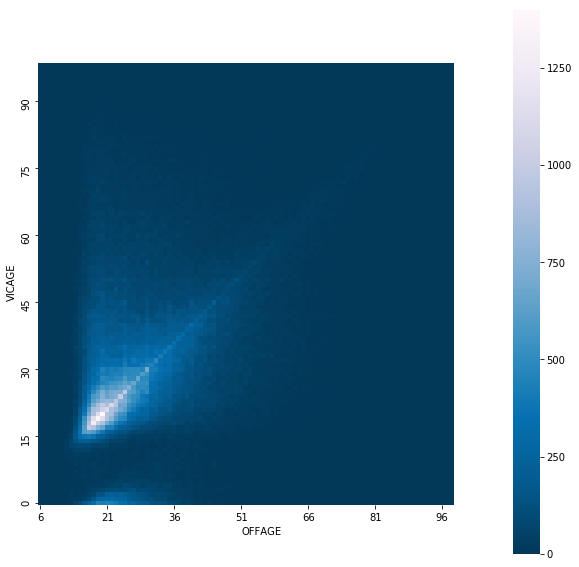

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap.fillna(0), square=True, cmap='PuBu_r', vmin=0, xticklabels=15, yticklabels=15)
plt.xlim(0, 100)
plt.ylim(0, 100)

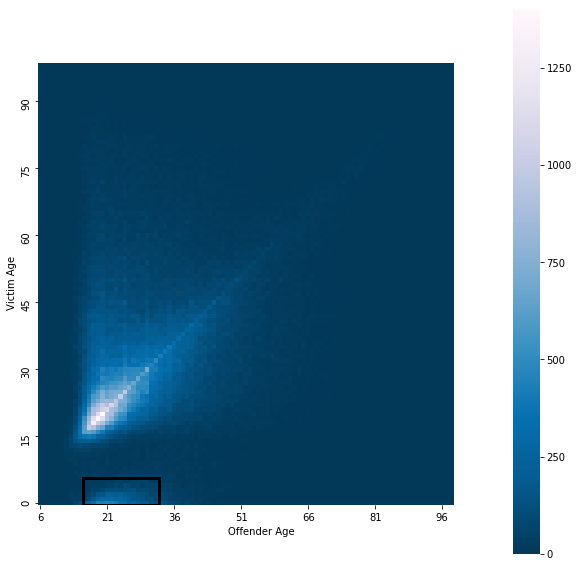

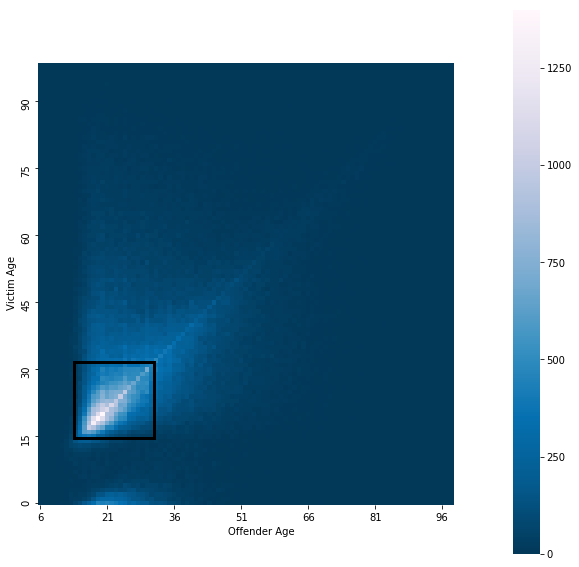

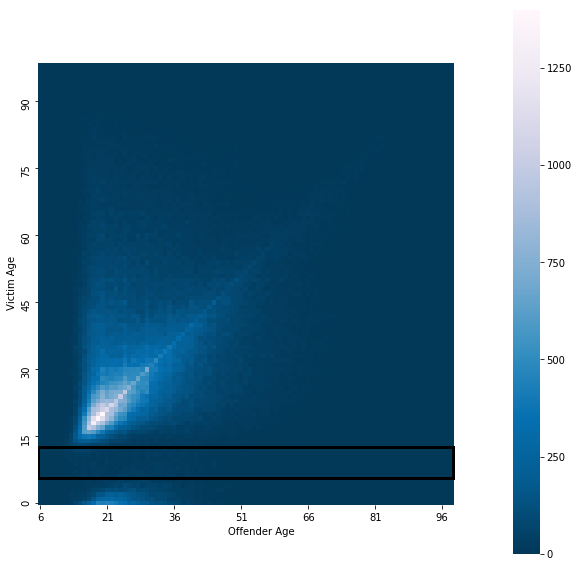

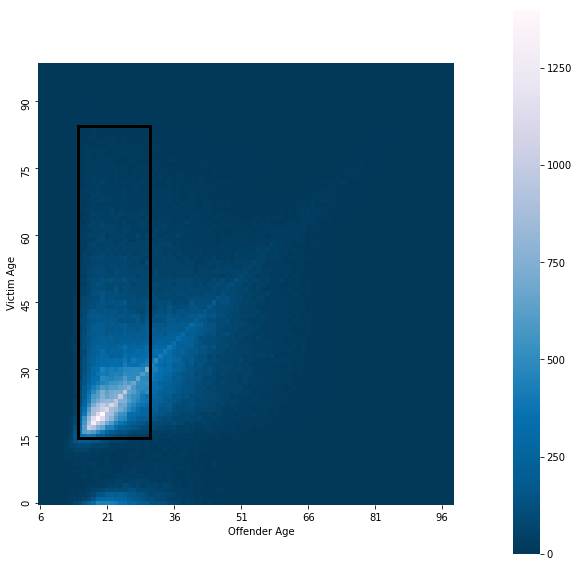

In [24]:
import matplotlib.patches as patches

rectangle_specs = [
    ((10, 0), 17, 6),
    ((8, 15), 18, 17),
    ((0, 6), 93, 7),
    ((9, 15), 16, 70)
]

for start, width, height in rectangle_specs:
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        heatmap.fillna(0),
        square=True,
        cmap='PuBu_r',
        vmin=0,
        xticklabels=15,
        yticklabels=15
    )
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    rect = patches.Rectangle(start, width, height, linewidth=3, edgecolor='k', facecolor='none')
    plt.gca().add_patch(rect)
    plt.xlabel('Offender Age')
    plt.ylabel('Victim Age')


In [25]:
stacked = heatmap.unstack().reset_index().rename({0: 'HOMICIDES'}, axis=1)
stacked.loc[stacked['HOMICIDES'] == max(stacked['HOMICIDES'])]

OFFAGE  VICAGE  HOMICIDES
1406      20      20     1398.0

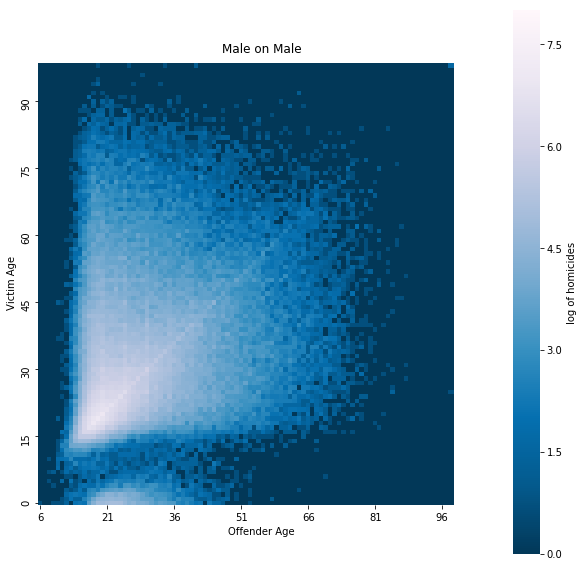

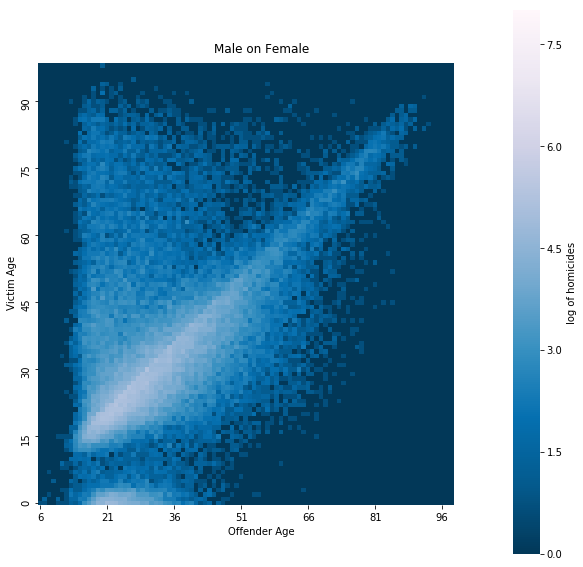

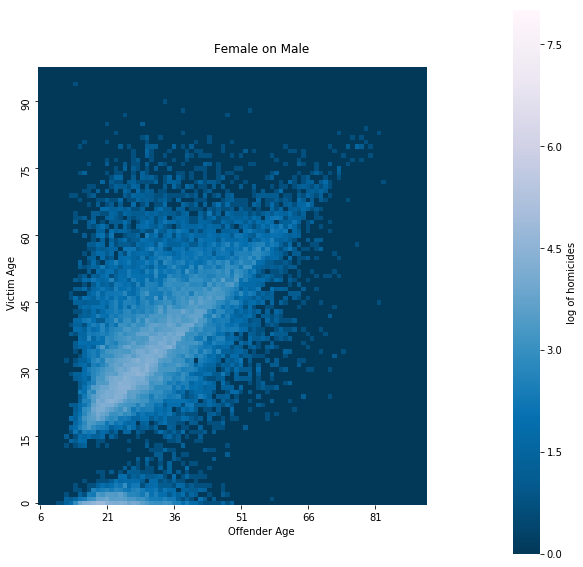

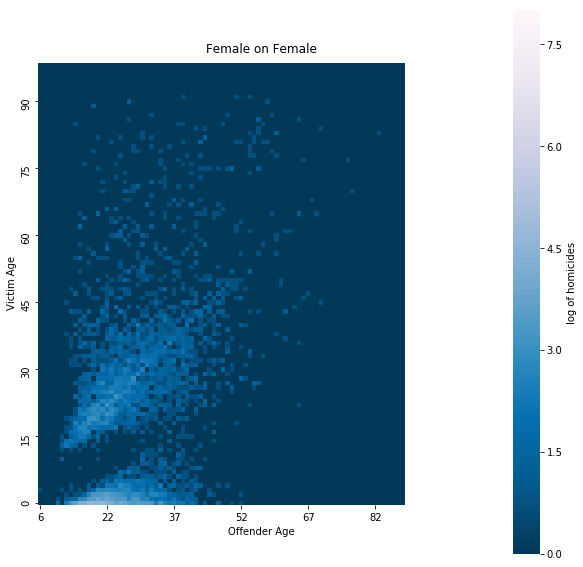

In [26]:
sex = {
    1: 'Male',
    2: 'Female'
}
for offsex, vicsex in ((1, 1), (1, 2), (2, 1), (2, 2)):
    data_filtered = data.loc[(data['OFFSEX'] == offsex) & (data['VICSEX'] == vicsex)]
    heatmap = pd.pivot_table(data_filtered, index='VICAGE', columns='OFFAGE', values='VICCOUNT', aggfunc='count')
    heatmap = heatmap.drop(99, axis=0, errors='ignore').drop(99, axis=1, errors='ignore')
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        heatmap.apply(np.log).fillna(0),
        square=True,
        cmap='PuBu_r',
        vmin=0,
        vmax=8,
        xticklabels=15,
        yticklabels=15,
        cbar_kws={'label': 'log of homicides'}
    )
    plt.xlabel('Offender Age')
    plt.ylabel('Victim Age')
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title(f'{sex[offsex]} on {sex[vicsex]}')

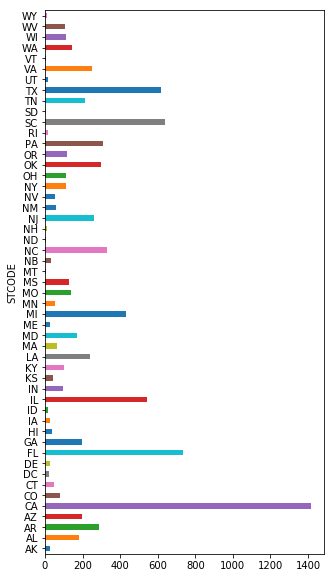

In [27]:
plt.figure(figsize=(5, 10))
data.loc[data['CIRCUM'] == 40].groupby(['STCODE'])['VICCOUNT'].count().plot(kind='barh')

In [28]:
data_byrace = pd.pivot_table(data.query('VICRACE != 9 & OFFRACE != 9'), index='VICRACE', columns=['OFFRACE', 'YEAR'], values='VICCOUNT', aggfunc='count')

Text(0.5,1,'RACE == 1')

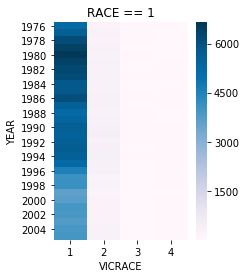

In [29]:
plt.figure(figsize=(3,4))
sns.heatmap(data_byrace.T.loc[1], cmap='PuBu')
plt.title('RACE == 1')

Text(0.5,1,'RACE == 2')

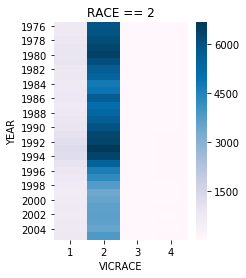

In [30]:
plt.figure(figsize=(3,4))
sns.heatmap(data_byrace.T.loc[2], cmap='PuBu')
plt.title('RACE == 2')

Text(0.5,1,'RACE == 3')

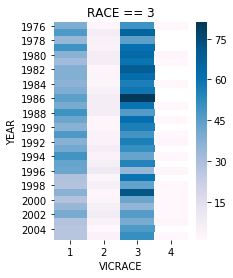

In [31]:
plt.figure(figsize=(3,4))
sns.heatmap(data_byrace.T.loc[3], cmap='PuBu')
plt.title('RACE == 3')

Text(0.5,1,'RACE == 4')

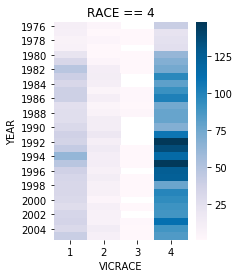

In [32]:
plt.figure(figsize=(3,4))
sns.heatmap(data_byrace.T.loc[4], cmap='PuBu')
plt.title('RACE == 4')

In [33]:
data_bymonth = data.groupby(['MONTH', 'YEAR'])['VICCOUNT'].sum().reset_index()
data_bymonth.head()

MONTH  YEAR  VICCOUNT
0      1  1976      1463
1      1  1977      1399
2      1  1978      1413
3      1  1979      1682
4      1  1980      1735

In [34]:
data_bymonth['DATETIME'] = pd.to_datetime(data_bymonth['YEAR'].apply(lambda s: f'{int(s):04d}') + '-' + data_bymonth['MONTH'].apply(lambda s: f'{int(s):02d}') + '-01') + pd.tseries.offsets.MonthEnd()
data_bymonth.sort_values('DATETIME', inplace=True)

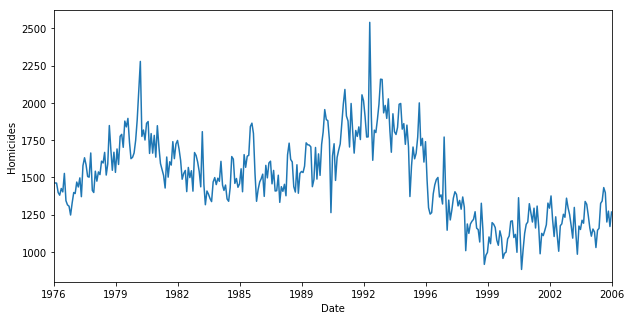

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(data_bymonth['DATETIME'], data_bymonth['VICCOUNT'])
plt.xlabel('Date')
plt.ylabel('Homicides')
plt.xlim(pd.to_datetime('1976-01-01'), pd.to_datetime('2006-01-01'))
plt.gca().xaxis.set_major_locator(mticks.LinearLocator(10))

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = data_bymonth.set_index('DATETIME')['VICCOUNT']
result = seasonal_decompose(series, model='additive')

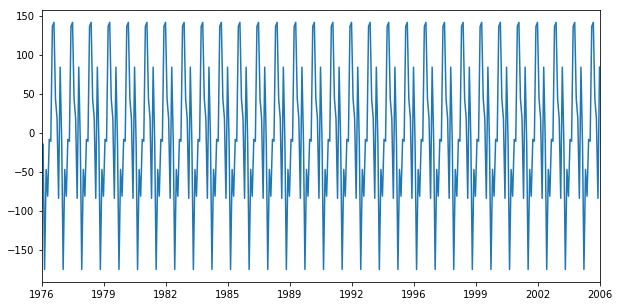

In [52]:
plt.figure(figsize=(10, 5))
seasonal_data = result.seasonal.reset_index()
plt.plot(seasonal_data['DATETIME'], seasonal_data['VICCOUNT'])
plt.xlim(pd.to_datetime('1976-01-01'), pd.to_datetime('2006-01-01'))
plt.gca().xaxis.set_major_locator(mticks.LinearLocator(10))

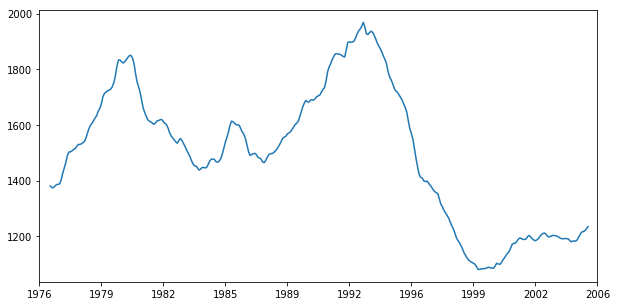

In [55]:
plt.figure(figsize=(10, 5))
trend_data = result.trend.reset_index()
plt.plot(trend_data['DATETIME'], trend_data['VICCOUNT'])
plt.xlim(pd.to_datetime('1976-01-01'), pd.to_datetime('2006-01-01'))
plt.gca().xaxis.set_major_locator(mticks.LinearLocator(10))

In [39]:
from sklearn.preprocessing import MinMaxScaler

def scale_row(series):
    result = MinMaxScaler().fit_transform(series.values.reshape(-1, 1))
    return pd.Series(np.squeeze(result))

In [40]:
data_tmp = data.groupby(['YEAR', 'MONTH'])['VICCOUNT'].sum()
yearmonth_heatmap = data_tmp.reset_index().pivot(index='YEAR', columns='MONTH').apply(scale_row, axis=1, result_type='expand')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to floa

Text(0.5,69,'MONTH')

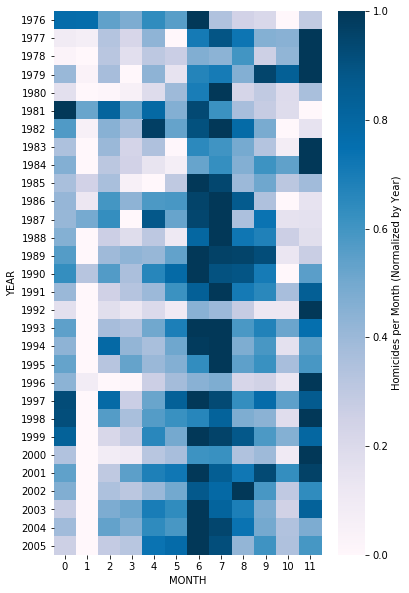

In [41]:
plt.figure(figsize=(6, 10))
sns.heatmap(yearmonth_heatmap, cmap='PuBu', cbar_kws={'label': 'Homicides per Month (Normalized by Year)'})
plt.xlabel('MONTH')